Connected to .venv (Python 3.11.5)

In [1]:
# DONE
%pip install labelme tensorflow-gpu opencv-python matplotlib albumentations

  Using cached labelme-5.3.1-py3-none-any.whl
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for albumentations from https://files.pythonhosted.org/packages/9b/f6/c486cedb4f75147232f32ec4c97026714cfef7c7e247a1f0427bc5489f66/albumentations-1.3.1-py3-none-any.whl.metadata
  Using cached albumentations-1.3.1-py3-none-any.whl.metadata (34 kB)
  Using cached gdown-4.7.1-py3-none-any.whl (15 kB)
  Obtaining dependency information for imgviz>=0.11 from https://files.pythonhosted.org/packages/20/23/ec40e1bc6b83ae33970ba9e9a6622d1b1f4357a3ff2b1fb5d87b0445ffa5/imgviz-1.7.4-py3-none-any.whl.metadata
  Using cached imgviz-1.7.4-py3-none-any.whl.metadata (5.6 kB)
  Obtaining dependency information for natsort>=7.1.0 from https://files.pythonhosted.org/packages/ef/82/7a9d0550484a62c6da82858ee9419f3dd1ccc9aa1c26a1e43da3ecd20b0d/natsort-8.4.0-py3-none-any.whl.m

  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\Joey\AppData\Local\Temp\pip-install-risyqw_d\tensorflow-gpu_af9ffdfc95bc41dcb45f43803d502348\setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
ERROR: Could not build

In [2]:
import os
import time
import uuid
import cv2

In [4]:
IMAGE_PATH = './images/'
number_images = 30


In [9]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print("Collecting image {}".format(imgnum))
    ret, frame = cap.read()
    imgname = './images/' +  str(uuid.uuid1()) + '.jpg'
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(.5)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [13]:
# %labelme

In [14]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt


In [20]:
images = tf.data.Dataset.list_files("./images/" + "*.jpg", shuffle=False)

In [24]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.image.decode_jpeg(byte_img)
    return img


In [25]:
images = images.map(load_image)

In [27]:
image_generator = images.batch(4).as_numpy_iterator()

In [28]:
plot_images = image_generator.next()

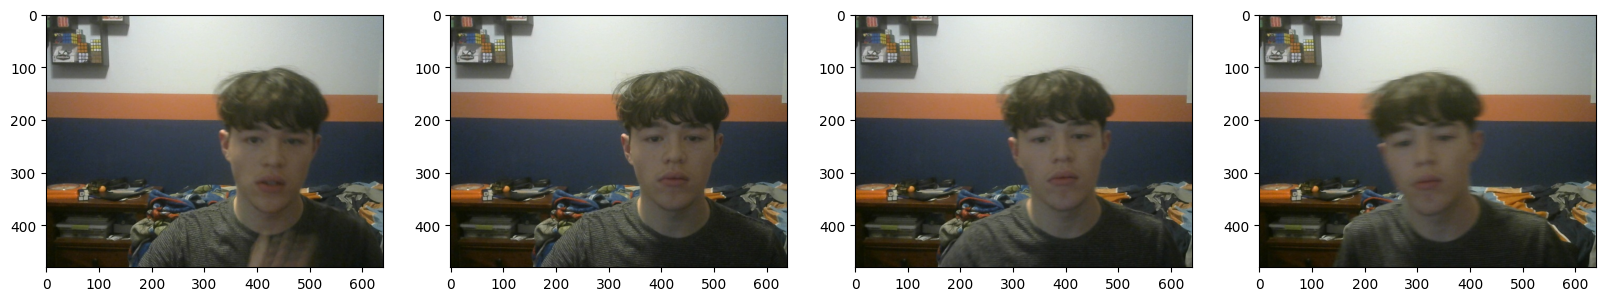

In [39]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(plot_images):
    ax[idx].imshow(img)

In [41]:
for folder in ['train', 'test', 'val']:
    for file in os.listdir(os.path.join('./', folder)):
        filename = file.split('.')[0] + '.json'
        existing_filepath = os.path.join('./', 'labels', filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('./', folder, 'labels', filename)
            os.replace(existing_filepath, new_filepath)
        

9faaf496-60bf-11ee-8d40-2cdb0706111a
a04af8ab-60bf-11ee-a0d7-2cdb0706111a
a099ec35-60bf-11ee-9ec0-2cdb0706111a
a0e97da4-60bf-11ee-ba2d-2cdb0706111a
a1383c9b-60bf-11ee-b617-2cdb0706111a
a188411c-60bf-11ee-aec7-2cdb0706111a
a228c5e7-60bf-11ee-bcbe-2cdb0706111a
a27871d0-60bf-11ee-9160-2cdb0706111a
a2c7c367-60bf-11ee-b943-2cdb0706111a
a3171d85-60bf-11ee-b02f-2cdb0706111a
a3669ed0-60bf-11ee-aef2-2cdb0706111a
a3b5d3e9-60bf-11ee-bc5e-2cdb0706111a
a4072384-60bf-11ee-8faa-2cdb0706111a
a458069c-60bf-11ee-b559-2cdb0706111a
a4a76986-60bf-11ee-a94b-2cdb0706111a
a4f8ce68-60bf-11ee-8976-2cdb0706111a
a59a94ab-60bf-11ee-87a0-2cdb0706111a
a5eb6913-60bf-11ee-a3f8-2cdb0706111a
a6dd6a00-60bf-11ee-97f1-2cdb0706111a
a72cb077-60bf-11ee-b96a-2cdb0706111a
a77c4d8e-60bf-11ee-852a-2cdb0706111a
a7cba6ae-60bf-11ee-8f26-2cdb0706111a
a81b0558-60bf-11ee-ac6e-2cdb0706111a
cf16cd0f-60bf-11ee-9653-2cdb0706111a
cf693a59-60bf-11ee-8f0b-2cdb0706111a
cfb8f605-60bf-11ee-8379-2cdb0706111a
d00952fc-60bf-11ee-bf82-2cdb0706111a
d